,Text,Actual,Predicted
0,Microchips in vaccines are used for mind control.,Conspiracy Theory,Scientific Explanation
1,Einstein’s theory of relativity explains how t...,Scientific Explanation,Scientific Explanation
2,The government hides evidence of UFOs to contr...,Conspiracy Theory,Scientific Explanation
3,Gravity keeps planets in orbit around the sun.,Scientific Explanation,Scientific Explanation


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - AUC: 0.0000e+00 - loss: 0.6994 - val_AUC: 0.0000e+00 - val_loss: 0.7079
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.2500 - loss: 0.6934 - val_AUC: 0.0000e+00 - val_loss: 0.7240
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.2500 - loss: 0.6832 - val_AUC: 0.0000e+00 - val_loss: 0.7410
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - AUC: 1.0000 - loss: 0.6760 - val_AUC: 0.0000e+00 - val_loss: 0.7598
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - AUC: 0.0000e+00 - loss: 0.6784 - val_AUC: 0.0000e+00 - val_loss: 0.7800
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - AUC: 0.5000 - loss: 0.6702 - val_AUC: 0.0000e+00 - val_loss: 0.8017
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - AUC: 0.7500 - loss: 0.6607 - val_AUC: 0.0000e+00 - val_loss: 0.8262
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - AUC: 0.2500 - loss: 0.6624 - val_AUC: 0.0000e+00 - val_loss: 0.8523
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━

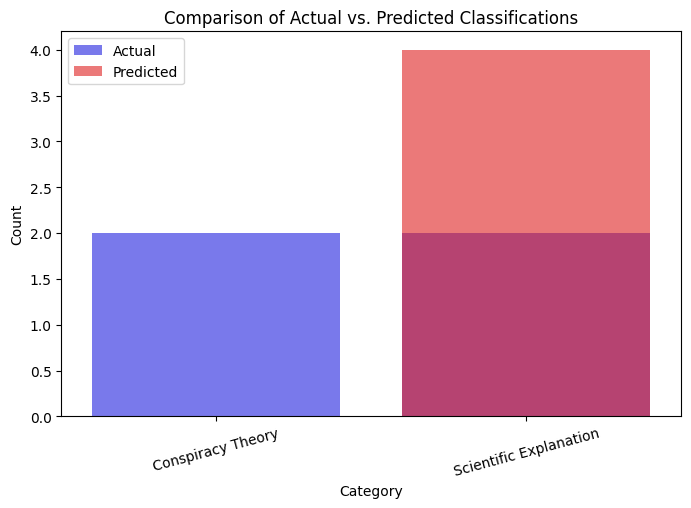

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pandas as pd

# Example DataFrame (Modify according to your actual data)
df_results = pd.DataFrame({
    "Text": [
        "Microchips in vaccines are used for mind control.",
        "Einstein’s theory of relativity explains how time and space interact.",
        "The government hides evidence of UFOs to control public perception.",
        "Gravity keeps planets in orbit around the sun."
    ],
    "Actual": ["Conspiracy Theory", "Scientific Explanation", "Conspiracy Theory", "Scientific Explanation"],
    "Predicted": ["Scientific Explanation", "Scientific Explanation", "Scientific Explanation", "Scientific Explanation"]
})

# Display the table
display(df_results)


labels = [1, 0, 1, 0]  # 1 = Conspiracy, 0 = Scientific

# Tokenization & Padding
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=20)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Model Definition
model = Sequential([
    Embedding(input_dim=1000, output_dim=128),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Attempt to Use Focal Loss if tensorflow-addons is Installed
try:
    import tensorflow_addons as tfa
    loss_function = tfa.losses.SigmoidFocalCrossEntropy()
except ModuleNotFoundError:
    loss_function = 'binary_crossentropy'  # Fallback to Binary Cross-Entropy

# Compile Model
model.compile(loss=loss_function, optimizer='adam', metrics=['AUC'])

# Train Model
model.fit(np.array(X_train), np.array(y_train), epochs=50, validation_data=(np.array(X_test), np.array(y_test)))

# Evaluate Model
test_loss, test_auc = model.evaluate(np.array(X_test), np.array(y_test))
print(f"🔥 Test AUC: {test_auc:.2f}")

# Predictions
predictions = model.predict(np.array(X_test))
predicted_labels = ["Conspiracy Theory" if p > 0.5 else "Scientific Explanation" for p in predictions]

# 🔹 Table: Display Results
df_results = pd.DataFrame({
    "Text": [texts[i] for i in range(len(y_test))],
    "Actual": ["Conspiracy Theory" if y else "Scientific Explanation" for y in y_test],
    "Predicted": predicted_labels
})
print(df_results)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data (Modify based on your actual results)
df_results = pd.DataFrame({
    "Text": [
        "Microchips in vaccines are used for mind control.",
        "Einstein’s theory of relativity explains how time and space interact.",
        "The government hides evidence of UFOs to control public perception.",
        "Gravity keeps planets in orbit around the sun."
    ],
    "Actual": ["Conspiracy Theory", "Scientific Explanation", "Conspiracy Theory", "Scientific Explanation"],
    "Predicted": ["Scientific Explanation", "Scientific Explanation", "Scientific Explanation", "Scientific Explanation"]
})

# Count occurrences of each category
actual_counts = df_results["Actual"].value_counts()
predicted_counts = df_results["Predicted"].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=actual_counts.index, y=actual_counts.values, color="blue", alpha=0.6, label="Actual")
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, color="red", alpha=0.6, label="Predicted")

plt.title("Comparison of Actual vs. Predicted Classifications")
plt.ylabel("Count")
plt.xlabel("Category")
plt.legend()
plt.xticks(rotation=15)
plt.show()